In [2]:
using Plots, JLD

In [3]:
state1_est_CVI = load(".\\state1_estimates_CVI.jld")["state1_estimate"];
var1_est_CVI = load(".\\var1_estimates_CVI.jld")["var1_estimate"];

state1_est_GP = load(".\\state1_estimates_GP.jld")["state1_estimate"];
var1_est_GP = load(".\\var1_estimates_GP.jld")["var1_estimate"];

tuning_points = load(".\\fine tuning points.jld")["tuning_point"];
time_cvi = load(".\\inference_time_cvi.jld")["inference_time"];
time_gp = load(".\\inference_time_gp.jld")["inference_time"]; 

## Compare the result of GP-CVI and CVI 

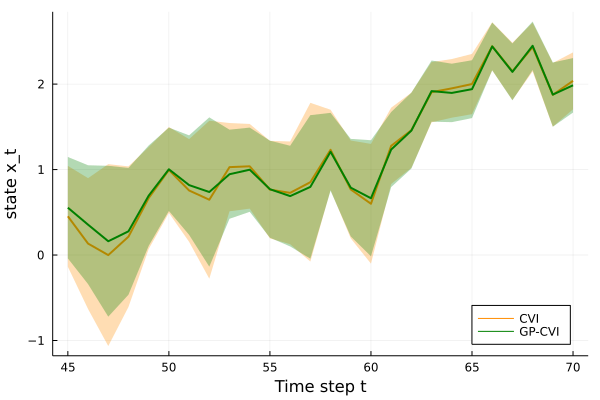

In [9]:
plot(45:70, state1_est_CVI[45:70],label = "CVI", lw = 2, color = :darkorange, ribbon = sqrt.(var1_est_CVI[45:70]), fillalpha=0.3)
plot!(45:70, state1_est_GP[45:70],label = "GP-CVI", legend = :bottomright, 
    ylabel = "state x_t", xlabel = "Time step t", lw = 2, color = :green, ribbon = sqrt.(var1_est_GP[45:70]), fillalpha=0.3)

In [10]:
savefig("F:\\Tue\\Master\\Thesis\\Presentation and report\\result.png")

In [11]:
tuning_points

2-element Vector{Any}:
 150
 290

In [12]:
timecvi_1 = sum(time_cvi[1:tuning_points[1]-25]); #from t=26 to fine-tuning (ft) point ft1
timecvi_2 = sum(time_cvi[tuning_points[1]-24:tuning_points[2]-25]); #from ft1 +1 to ft2
timecvi_3 = sum(time_cvi[tuning_points[2]-24:end]); #from ft2 +1 to end

In [13]:
[timecvi_1, timecvi_2, timecvi_3]

3-element Vector{Float64}:
 21.969224099999998
 58.44414259999997
 46.50475020000001

In [14]:
time1 = sum(time_gp[1:tuning_points[1]-25]); #from t=2 to ft1
time2 = sum(time_gp[tuning_points[1]-24:tuning_points[2]-25]); #from ft1 +1 to ft2
time3 = sum(time_gp[tuning_points[2]-24:end]); #from ft2 +1 to end

In [15]:
[time1, time2, time3]

3-element Vector{Float64}:
 20.274782099999996
 29.619737699999995
 14.073107799999995